In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

# Chi$^2$ Test for Independence
- Lets us test the hypothesis is that one group is independent of another
- $H_0$ is always that there is independence between the groups
- $H_0$ is that there is no dependence

## The Quick Way To Run a Chi$^2$ Test

In [52]:
# get your data
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/6ba2dd985c9aa92f5598fc0f7c359f6a/raw/b20a508cee46e6ac69eb1e228b167d6f42d665d8/attrition.csv")

In [54]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Check for which columns are discrete

In [58]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
# Is Attrition independent from Business Travel amount?
# Is Attrition independent from Department?
# Is Attrition indpendent from Job Satisfaction

In [64]:
observed = pd.crosstab(df.Attrition, df.BusinessTravel)

In [65]:
observed

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,138,208,887
Yes,12,69,156


$H_0$: Attrition and Travel Frequency are independent (not dependent)

$H_a$: Attrition and Travel Frequency are dependent

In [62]:
# Set our alpha
# alpha nice and low
alpha = .01

In [63]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [66]:
null_hypothesis = "Attrition and Business Travel are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We reject the null hypothesis
We reject the hypothesis that Attrition and Business Travel are independent
5.608614476449931e-06


In [68]:
observed = pd.crosstab(df.Attrition, df.BusinessTravel, normalize=True)
observed

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,0.093878,0.141497,0.603401
Yes,0.008163,0.046939,0.106122


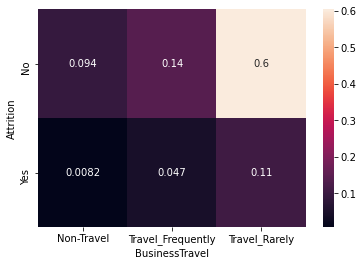

In [70]:
sns.heatmap(observed, annot=True)

In [72]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Let's Test for Independence of Attrition and Deparment
- $H_0$: There is no relationship between them, Attition and Deparment are independent
- $H_a$: There is a relationship

In [74]:
observed = pd.crosstab(df.Attrition, df.Department)
observed

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


In [75]:
# Let's get the p value from a chi2 test for independence
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [77]:
if p < alpha:
    print("We reject the null")
else:
    print("We fail to reject the null")

p

We reject the null


0.004525606574479633

In [81]:
(df.Department == "Sales").size


1470

In [86]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [93]:
mask = df.Department == "Sales"
mask

0        True
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468     True
1469    False
Name: Department, Length: 1470, dtype: bool

In [97]:
# dataframe[mask] gives you back a subset
df[mask]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
18,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,23,...,3,80,0,31,3,3,25,8,3,7
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0,10,4,3,5,3,0,3
27,42,No,Travel_Rarely,691,Sales,8,4,Marketing,1,35,...,4,80,1,10,2,3,9,7,4,2
29,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,38,...,4,80,0,22,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,45,No,Travel_Rarely,374,Sales,20,3,Life Sciences,1,2046,...,3,80,0,8,3,3,5,3,0,1
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0


In [98]:
df["in_sales"] = df.Department == "Sales"

In [101]:
observed = pd.crosstab(df.Attrition, df.in_sales)
observed

in_sales,False,True
Attrition,,
No,879,354
Yes,145,92


## $H_0$: Attrition and Being in Sales or Not are independent
## $H_a$: There is a relationship

In [102]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("We reject the null")
else:
    print("We fail to reject the null")

p

We reject the null


0.0025036788527795267

In [103]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,in_sales
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,True
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,False
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,False
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,False
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,False


In [104]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

## Let's test for independence between WorkLifeBalance and Attrition
- $H_0$: WorkLifeBalance and Attrition are independent, no relationship
- $H_a$: They are dependent - there is a relationship

In [105]:
observed = pd.crosstab(df.Attrition, df.WorkLifeBalance)
observed

WorkLifeBalance,1,2,3,4
Attrition,,,,
No,55,286,766,126
Yes,25,58,127,27


In [106]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null")

We reject the null hypothesis


In [107]:
p

0.0009725698845348824

In [ ]:
# Now, let's control for Department

In [108]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [109]:
r_n_d = df[df.Department == "Research & Development"]
sales = df[df.Department == "Sales"]
hr = df[df.Department == "Human Resources"]

In [113]:
# Run the chi squared test for independence on only RND
observed = pd.crosstab(r_n_d.Attrition, r_n_d.WorkLifeBalance)
observed

WorkLifeBalance,1,2,3,4
Attrition,,,,
No,41,203,507,77
Yes,19,32,68,14


In [115]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null")
p

We reject the null hypothesis


0.0004119601633396577

In [116]:
observed = pd.crosstab(sales.Attrition, sales.WorkLifeBalance)
observed

WorkLifeBalance,1,2,3,4
Attrition,,,,
No,10,78,226,40
Yes,6,24,50,12


In [117]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null")
p

We fail to reject the null


0.20695513054029363

In [118]:
observed = pd.crosstab(hr.Attrition, hr.WorkLifeBalance)
observed

WorkLifeBalance,1,2,3,4
Attrition,,,,
No,4,5,33,9
Yes,0,2,9,1


In [119]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null")
p

We fail to reject the null


0.5645088718158451

## Findings So Far:
$H_0$ is that there is no relationship. Worklife and Attrition are indpendent

- Research and Development, we reject the null hypothesis
- Sales, we fail to reject the null. This could be due to small population size.
- HR, we fail to reject the null. This could be due to small population size